In [1]:
import pandas
import numpy
from IPython.display import display

### Read csv file as a pandas dataframe

In [2]:
data = pandas.read_csv("../data/open_nav_rand.cap", header=None, index_col=None)

In [3]:
data.shape

(11031432, 6)

In [4]:
data.head()

,0,1,2,3,4,5
0,systemd,1,auditd,1093,write,>
1,systemd,1,auditd,1093,write,<
2,systemd,1,auditd,1093,recvfrom,>
3,systemd,1,auditd,1093,recvfrom,<
4,systemd,1,auditd,1093,write,>


In [5]:
data.columns = ["parent", "parent_pid", "process", "pid", "event", "dir"]

In [6]:
data.head()

,parent,parent_pid,process,pid,event,dir
0,systemd,1,auditd,1093,write,>
1,systemd,1,auditd,1093,write,<
2,systemd,1,auditd,1093,recvfrom,>
3,systemd,1,auditd,1093,recvfrom,<
4,systemd,1,auditd,1093,write,>


In [7]:
data["process"].unique()

array(['auditd', 'atom', 'chrome', 'gmain', 'Network', 'Chrome_IOThread',
       'Watchdog', 'slack', 'spotify', 'Compositor', 'Chrome_ChildIOT',
       'GpuMemoryThread', 'systemd-journal', 'in:imuxsock', 'dockerd',
       'docker-containe', 'TaskSchedulerFo', 'InputThread', 'Xorg',
       'lxterminal', 'openbox', 'evince', 'update-manager', 'variety',
       'update-notifier', 'xfce4-power-man', 'at-spi2-registr',
       'nm-applet', 'xscreensaver', 'lxsession', 'lxpanel',
       'redshift-gtk', 'pcmanfm', 'jupyter-lab', 'AsyncKeyValueSt',
       'CompositorTileW', 'zsh', 'python3', 'rs:main', 'NetworkManager',
       'gdbus', 'dbus-daemon', 'irqbalance', 'rtkit-daemon', 'redshift',
       'in:imklog', 'LevelDBEnv', 'sh', 'navigator', 'ls', 'sleep',
       'Core', 'avahi-daemon', 'influxd', 'winbindd', 'thermald', 'Dial',
       'leafpad', 'TaskSchedulerBa', 'CPU', 'gnome-keyring-d', 'gvfsd',
       'upowerd', 'xfce4-notifyd', 'xfconfd', 'TaskSchedulerSe',
       'TaskSchedulerSi', '

In [8]:
data["event"].unique()

array(['write', 'recvfrom', 'recvmsg', 'read', 'close', 'clone', 'sendto',
       'sendmsg', 'writev', 'unlink', 'execve', 'rename', 'socket',
       'connect', 'accept', 'kill', 'pipe', 'readv'], dtype=object)

In [9]:
data["parent"].unique()

array(['systemd', 'atom', 'lxpanel', 'slack', 'spotify', 'chrome',
       'dockerd', 'lightdm', 'openbox', 'lxsession', 'pcmanfm', 'zsh',
       'redshift-gtk', 'python3', 'sh', 'navigator', 'winbindd',
       'leafpad', 'systemd-udevd', 'apm', '<NA>', 'node', 'gvfsd', 'exe',
       'at-spi-bus-laun'], dtype=object)

In [10]:
# open_file = data[(data["process"] == "atom") | (data["process"] == "leafpad")].drop_duplicates()
# open_file = data[(data["process"] == "atom") | (data["process"] == "leafpad")].drop_duplicates()
relevant = data.drop_duplicates()

In [11]:
relevant.shape

(1806, 6)

In [12]:
relevant["process"].unique()

array(['auditd', 'atom', 'chrome', 'gmain', 'Network', 'Chrome_IOThread',
       'Watchdog', 'slack', 'spotify', 'Compositor', 'Chrome_ChildIOT',
       'GpuMemoryThread', 'systemd-journal', 'in:imuxsock', 'dockerd',
       'docker-containe', 'TaskSchedulerFo', 'InputThread', 'Xorg',
       'lxterminal', 'openbox', 'evince', 'update-manager', 'variety',
       'update-notifier', 'xfce4-power-man', 'at-spi2-registr',
       'nm-applet', 'xscreensaver', 'lxsession', 'lxpanel',
       'redshift-gtk', 'pcmanfm', 'jupyter-lab', 'AsyncKeyValueSt',
       'CompositorTileW', 'zsh', 'python3', 'rs:main', 'NetworkManager',
       'gdbus', 'dbus-daemon', 'irqbalance', 'rtkit-daemon', 'redshift',
       'in:imklog', 'LevelDBEnv', 'sh', 'navigator', 'ls', 'sleep',
       'Core', 'avahi-daemon', 'influxd', 'winbindd', 'thermald', 'Dial',
       'leafpad', 'TaskSchedulerBa', 'CPU', 'gnome-keyring-d', 'gvfsd',
       'upowerd', 'xfce4-notifyd', 'xfconfd', 'TaskSchedulerSe',
       'TaskSchedulerSi', '

In [13]:
unique_procs = relevant[["process", "pid"]]
unique_procs = unique_procs.drop_duplicates()
unique_procs

,process,pid
0,auditd,1093
289,atom,18721
4848,chrome,3541
12332,atom,18772
25070,gmain,1300
25243,Network,18255
39188,Chrome_IOThread,3541
85591,Watchdog,17158
85614,slack,17158
87847,Watchdog,18282


In [14]:
processes = []
for i,row in unique_procs.iterrows():
    #print(f"{relevant[(relevant['pid'] == row['pid']) & (relevant['process'] == row['process'])]}")
    processes.append(relevant[(relevant["pid"] == row["pid"]) & (relevant["process"] == row["process"])])

------

In [15]:
from sklearn.preprocessing import LabelEncoder
from functools import reduce
import matplotlib.pyplot as plotter

In [27]:
def plot_line(seq):
    plotter.plot(seq[:100], alpha=0.5, linewidth=0.5, marker='.')
    plotter.ylim(-2, 20)

In [17]:
encoder = LabelEncoder()

data = relevant

syscalls = data["event"]
data["syscalls"] = syscalls
data["event"] = encoder.fit_transform(syscalls)

In [18]:
data.head(10)

,parent,parent_pid,process,pid,event,dir,syscalls
0,systemd,1,auditd,1093,16,>,write
1,systemd,1,auditd,1093,16,<,write
2,systemd,1,auditd,1093,9,>,recvfrom
3,systemd,1,auditd,1093,9,<,recvfrom
289,atom,18718,atom,18721,16,>,write
299,atom,18718,atom,18721,16,<,write
301,atom,18718,atom,18721,10,>,recvmsg
304,atom,18718,atom,18721,10,<,recvmsg
309,atom,18718,atom,18721,7,>,read
311,atom,18718,atom,18721,7,<,read


In [19]:
relevant = data[(data["process"] == "atom") | (data["process"] == "leafpad")].drop_duplicates()

In [20]:
relevant.head(10)

,parent,parent_pid,process,pid,event,dir,syscalls
289,atom,18718,atom,18721,16,>,write
299,atom,18718,atom,18721,16,<,write
301,atom,18718,atom,18721,10,>,recvmsg
304,atom,18718,atom,18721,10,<,recvmsg
309,atom,18718,atom,18721,7,>,read
311,atom,18718,atom,18721,7,<,read
12332,atom,18724,atom,18772,7,<,read
12336,atom,18724,atom,18772,16,>,write
12341,atom,18724,atom,18772,7,>,read
12346,atom,18724,atom,18772,16,<,write


Seperate atom and leafpad data

In [21]:
processes = []
for i,row in unique_procs.iterrows():
    #print(f"{relevant[(relevant['pid'] == row['pid']) & (relevant['process'] == row['process'])]}")
    proc = relevant[(relevant["pid"] == row["pid"]) & (relevant["process"] == row["process"])]
    if proc.shape[0] > 0:
        processes.append(proc)
    else:
        continue

In [22]:
#print(list(map(lambda x: x.shape[0], data_points)))
events = list(map(lambda x: numpy.array(x["event"]), processes))
#print(list(events))
max_len = reduce(lambda a,b: max(a,b), map(lambda x: x.shape[0], events))
#print(max_len)
#print(list(events))
data_points = list(map(lambda x: numpy.pad(x, (0, max_len - x.shape[0]), 'constant', constant_values=-1), events))

,parent,parent_pid,process,pid,event,dir,syscalls
289,atom,18718,atom,18721,16,>,write
299,atom,18718,atom,18721,16,<,write
301,atom,18718,atom,18721,10,>,recvmsg
304,atom,18718,atom,18721,10,<,recvmsg
309,atom,18718,atom,18721,7,>,read
311,atom,18718,atom,18721,7,<,read
178973,atom,18718,atom,18721,1,<,clone
2300241,atom,18718,atom,18721,17,>,writev
2300242,atom,18718,atom,18721,17,<,writev
3473585,atom,18718,atom,18721,2,>,close


,parent,parent_pid,process,pid,event,dir,syscalls
12332,atom,18724,atom,18772,7,<,read
12336,atom,18724,atom,18772,16,>,write
12341,atom,18724,atom,18772,7,>,read
12346,atom,18724,atom,18772,16,<,write
12613,atom,18724,atom,18772,2,>,close
12621,atom,18724,atom,18772,2,<,close
25803,atom,18724,atom,18772,1,>,clone
25864,atom,18724,atom,18772,1,<,clone


,parent,parent_pid,process,pid,event,dir,syscalls
91948,atom,18721,atom,18751,10,>,recvmsg
91949,atom,18721,atom,18751,10,<,recvmsg
91950,atom,18721,atom,18751,7,>,read
91951,atom,18721,atom,18751,7,<,read
92248,atom,18721,atom,18751,2,>,close
92249,atom,18721,atom,18751,2,<,close
440415,atom,18721,atom,18751,16,>,write
440421,atom,18721,atom,18751,16,<,write
3435004,atom,18721,atom,18751,17,>,writev
3435010,atom,18721,atom,18751,17,<,writev


,parent,parent_pid,process,pid,event,dir,syscalls
2218569,systemd,1,leafpad,32764,7,<,read
2218600,systemd,1,leafpad,32764,7,>,read
2218603,systemd,1,leafpad,32764,2,>,close
2218617,systemd,1,leafpad,32764,2,<,close
2277082,systemd,1,leafpad,32764,16,>,write
2277088,systemd,1,leafpad,32764,16,<,write
2277099,systemd,1,leafpad,32764,1,>,clone
2277105,systemd,1,leafpad,32764,1,<,clone
2277289,systemd,1,leafpad,32764,14,>,socket
2277292,systemd,1,leafpad,32764,14,<,socket


,parent,parent_pid,process,pid,event,dir,syscalls
3420092,atom,-1,atom,1155,1,<,clone
3420093,atom,-1,atom,1155,7,>,read
3420094,atom,-1,atom,1155,7,<,read
3422152,atom,-1,atom,1155,16,>,write
3422154,atom,-1,atom,1155,16,<,write
3422190,atom,-1,atom,1155,2,>,close
3422191,atom,-1,atom,1155,2,<,close
3422203,atom,-1,atom,1155,12,>,sendmsg
3422205,atom,-1,atom,1155,12,<,sendmsg
3422416,atom,-1,atom,1155,10,>,recvmsg


,parent,parent_pid,process,pid,event,dir,syscalls
3432979,atom,18724,atom,1411,16,>,write
3433195,atom,18724,atom,1411,16,<,write
3437657,atom,18724,atom,1411,7,>,read
3437659,atom,18724,atom,1411,7,<,read
3438248,atom,18724,atom,1411,2,>,close
3438258,atom,18724,atom,1411,2,<,close
4024963,atom,18724,atom,1411,1,>,clone
4024979,atom,18724,atom,1411,1,<,clone
4081544,atom,18724,atom,1411,12,>,sendmsg
4081545,atom,18724,atom,1411,12,<,sendmsg


,parent,parent_pid,process,pid,event,dir,syscalls
3539076,sh,1462,leafpad,1463,4,<,execve
3539085,sh,1462,leafpad,1463,2,>,close
3539086,sh,1462,leafpad,1463,2,<,close
3539091,sh,1462,leafpad,1463,7,>,read
3539092,sh,1462,leafpad,1463,7,<,read
3539531,sh,1462,leafpad,1463,14,>,socket
3539532,sh,1462,leafpad,1463,14,<,socket
3539533,sh,1462,leafpad,1463,3,>,connect
3539534,sh,1462,leafpad,1463,3,<,connect
3598257,sh,1462,leafpad,1463,10,>,recvmsg


,parent,parent_pid,process,pid,event,dir,syscalls
4100567,atom,1411,atom,1711,1,<,clone
4100714,atom,1411,atom,1711,2,>,close
4100719,atom,1411,atom,1711,2,<,close
4100757,atom,1411,atom,1711,4,>,execve


,parent,parent_pid,process,pid,event,dir,syscalls
4195097,atom,1729,atom,1756,1,<,clone
4195101,atom,1729,atom,1756,2,>,close
4195103,atom,1729,atom,1756,2,<,close
4195112,atom,1729,atom,1756,6,>,pipe
4195113,atom,1729,atom,1756,6,<,pipe
4195114,atom,1729,atom,1756,1,>,clone
4195118,atom,1729,atom,1756,7,>,read
4195814,atom,1729,atom,1756,7,<,read
4195894,atom,1729,atom,1756,4,>,execve


,parent,parent_pid,process,pid,event,dir,syscalls
4195126,atom,1756,atom,1757,1,<,clone
4195227,atom,1756,atom,1757,2,>,close
4195228,atom,1756,atom,1757,2,<,close
4195416,atom,1756,atom,1757,1,>,clone


,parent,parent_pid,process,pid,event,dir,syscalls
4195694,atom,1757,atom,1758,1,<,clone
4195715,atom,1757,atom,1758,4,>,execve


,parent,parent_pid,process,pid,event,dir,syscalls
4196372,atom,1729,atom,1759,1,<,clone
4196374,atom,1729,atom,1759,2,>,close
4196377,atom,1729,atom,1759,2,<,close
4196381,atom,1729,atom,1759,4,>,execve


,parent,parent_pid,process,pid,event,dir,syscalls
4197642,atom,1760,atom,1761,1,<,clone
4197685,atom,1760,atom,1761,2,>,close
4197686,atom,1760,atom,1761,2,<,close
4197923,atom,1760,atom,1761,16,>,write
4197924,atom,1760,atom,1761,16,<,write


,parent,parent_pid,process,pid,event,dir,syscalls
4198508,atom,1760,atom,1762,1,<,clone
4198509,atom,1760,atom,1762,2,>,close
4198510,atom,1760,atom,1762,2,<,close
4198511,atom,1760,atom,1762,4,>,execve
4273856,atom,1760,atom,1762,7,<,read
4273857,atom,1760,atom,1762,7,>,read
4450542,atom,1760,atom,1762,10,>,recvmsg
4450544,atom,1760,atom,1762,10,<,recvmsg
4450559,atom,1760,atom,1762,17,>,writev
4450561,atom,1760,atom,1762,17,<,writev


,parent,parent_pid,process,pid,event,dir,syscalls
4501096,exe,1901,atom,1908,1,<,clone
4501097,exe,1901,atom,1908,16,>,write
4501098,exe,1901,atom,1908,16,<,write
4507368,exe,1901,atom,1908,6,>,pipe
4507370,exe,1901,atom,1908,6,<,pipe
4507387,exe,1901,atom,1908,7,>,read
4507388,exe,1901,atom,1908,7,<,read
4507396,exe,1901,atom,1908,10,>,recvmsg
4507398,exe,1901,atom,1908,10,<,recvmsg
4507401,exe,1901,atom,1908,13,>,sendto


,parent,parent_pid,process,pid,event,dir,syscalls
4519738,atom,1762,atom,1915,1,<,clone
4519917,atom,1762,atom,1915,2,>,close
4519924,atom,1762,atom,1915,2,<,close
4520436,atom,1762,atom,1915,4,>,execve
4520442,atom,1762,atom,1915,4,<,execve
4545535,atom,1762,atom,1915,7,<,read
4545536,atom,1762,atom,1915,7,>,read


,parent,parent_pid,process,pid,event,dir,syscalls
4548026,atom,18724,atom,1942,1,>,clone
4548077,atom,18724,atom,1942,1,<,clone
4567495,atom,18724,atom,1942,7,>,read
4567497,atom,18724,atom,1942,7,<,read
4567511,atom,18724,atom,1942,2,>,close
4567516,atom,18724,atom,1942,2,<,close
4598092,atom,18724,atom,1942,16,>,write
4598093,atom,18724,atom,1942,16,<,write


,parent,parent_pid,process,pid,event,dir,syscalls
4732541,atom,18721,atom,18724,10,>,recvmsg
4732542,atom,18721,atom,18724,10,<,recvmsg
6424551,atom,18721,atom,18724,6,>,pipe
6424555,atom,18721,atom,18724,6,<,pipe
6424557,atom,18721,atom,18724,1,>,clone
6424833,atom,18721,atom,18724,1,<,clone
6424847,atom,18721,atom,18724,2,>,close
6424853,atom,18721,atom,18724,2,<,close
6425675,atom,18721,atom,18724,16,>,write
6425683,atom,18721,atom,18724,16,<,write


,parent,parent_pid,process,pid,event,dir,syscalls
6301453,atom,-1,atom,2636,1,<,clone
6387847,atom,-1,atom,2636,7,>,read
6387848,atom,-1,atom,2636,7,<,read
6387849,atom,-1,atom,2636,16,>,write
6387850,atom,-1,atom,2636,16,<,write
6387851,atom,-1,atom,2636,12,>,sendmsg
6387852,atom,-1,atom,2636,12,<,sendmsg
6387923,atom,-1,atom,2636,10,>,recvmsg
6387924,atom,-1,atom,2636,10,<,recvmsg
6387935,atom,-1,atom,2636,2,>,close


,parent,parent_pid,process,pid,event,dir,syscalls
6304629,atom,2636,atom,2639,1,<,clone
6305008,atom,2636,atom,2639,2,>,close
6305020,atom,2636,atom,2639,2,<,close
6305155,atom,2636,atom,2639,4,>,execve
6309839,atom,2636,atom,2639,4,<,execve
6309979,atom,2636,atom,2639,7,>,read
6309981,atom,2636,atom,2639,7,<,read
6323069,atom,2636,atom,2639,10,>,recvmsg
6323073,atom,2636,atom,2639,10,<,recvmsg
6323075,atom,2636,atom,2639,16,>,write


,parent,parent_pid,process,pid,event,dir,syscalls
6425444,atom,18724,atom,2696,1,<,clone
6425534,atom,18724,atom,2696,2,>,close
6425550,atom,18724,atom,2696,2,<,close
6425607,atom,18724,atom,2696,12,>,sendmsg
6425613,atom,18724,atom,2696,12,<,sendmsg
6425685,atom,18724,atom,2696,7,>,read
6425690,atom,18724,atom,2696,7,<,read
6426933,atom,18724,atom,2696,6,>,pipe
6426942,atom,18724,atom,2696,6,<,pipe
6426961,atom,18724,atom,2696,16,>,write


,parent,parent_pid,process,pid,event,dir,syscalls
7685184,atom,-1,atom,3186,1,<,clone
7733820,atom,-1,atom,3186,7,>,read
7733821,atom,-1,atom,3186,7,<,read
7734677,atom,-1,atom,3186,16,>,write
7734678,atom,-1,atom,3186,16,<,write
7734679,atom,-1,atom,3186,12,>,sendmsg
7734681,atom,-1,atom,3186,12,<,sendmsg
7734768,atom,-1,atom,3186,10,>,recvmsg
7734769,atom,-1,atom,3186,10,<,recvmsg
7735649,atom,-1,atom,3186,6,>,pipe


,parent,parent_pid,process,pid,event,dir,syscalls
7738916,atom,3186,atom,3242,1,<,clone
7738917,atom,3186,atom,3242,2,>,close
7738918,atom,3186,atom,3242,2,<,close
7739069,atom,3186,atom,3242,4,>,execve
7739070,atom,3186,atom,3242,4,<,execve


,parent,parent_pid,process,pid,event,dir,syscalls
7739082,atom,-1,atom,3239,1,<,clone
7739083,atom,-1,atom,3239,16,>,write
7739084,atom,-1,atom,3239,16,<,write


,parent,parent_pid,process,pid,event,dir,syscalls
7739822,atom,18724,atom,3260,7,>,read
7739824,atom,18724,atom,3260,7,<,read
7739833,atom,18724,atom,3260,2,>,close
7739838,atom,18724,atom,3260,2,<,close
7743218,atom,18724,atom,3260,16,>,write
7743253,atom,18724,atom,3260,16,<,write
7750148,atom,18724,atom,3260,6,>,pipe
7750162,atom,18724,atom,3260,6,<,pipe
7750176,atom,18724,atom,3260,1,>,clone
7758597,atom,18724,atom,3260,1,<,clone


,parent,parent_pid,process,pid,event,dir,syscalls
7764950,atom,3260,atom,3283,1,<,clone
7765032,atom,3260,atom,3283,2,>,close
7765039,atom,3260,atom,3283,2,<,close
7765315,atom,3260,atom,3283,4,>,execve
7765319,atom,3260,atom,3283,4,<,execve


,parent,parent_pid,process,pid,event,dir,syscalls
8380999,leafpad,3539,leafpad,3542,1,<,clone
8381323,leafpad,3539,leafpad,3542,7,>,read
8381324,leafpad,3539,leafpad,3542,7,<,read
8381340,leafpad,3539,leafpad,3542,16,>,write
8381345,leafpad,3539,leafpad,3542,16,<,write
8381349,leafpad,3539,leafpad,3542,12,>,sendmsg
8381353,leafpad,3539,leafpad,3542,12,<,sendmsg
8382645,leafpad,3539,leafpad,3542,10,>,recvmsg
8382647,leafpad,3539,leafpad,3542,10,<,recvmsg


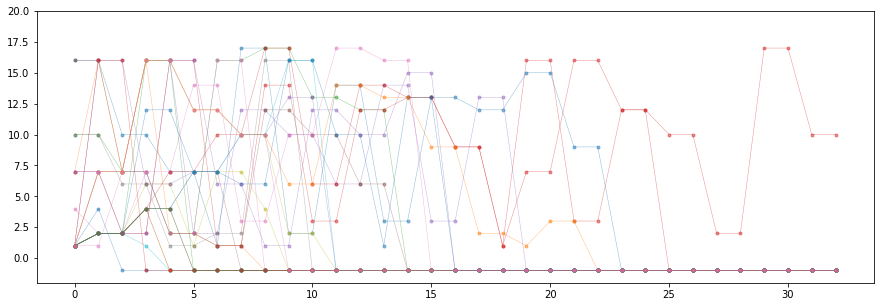

In [28]:
fig = plotter.figure(figsize=(15,5))
for i in range(len(data_points)):
    display(processes[i].head(10))
    plot_line(data_points[i])
plotter.show()